# Descripción del proyecto

Para este proyecto, se trabajará con datos de Instacart.

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash. Este conjunto de datos particular fue lanzado públicamente (materiales en inglés) por Instacart en 2017 para una competición Kaggle (materiales en inglés). Los datos reales pueden descargarse directamente de la página de la competición Kaggle.

El conjunto de datos que me han proporcionado tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido y se introdujeron valores ausentes y duplicados. Se tuvo cuidado de conservar las distribuciones de los datos originales cuando se hicieron los cambios.

La misión es limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart. Después de responder a cada pregunta, se escribió una breve explicación de los resultados en una celda markdown de tu Jupyter notebook.

Este proyecto requerirá de gráficos que comuniquen los resultados.

# Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.

- 'order_id': número de ID que identifica de manera única cada pedido.

- 'user_id': número de ID que identifica de manera única la cuenta de cada cliente.

- 'order_number': el número de veces que este cliente ha hecho un pedido.

- 'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).

- 'order_hour_of_day': hora del día en que se hizo el pedido.

- 'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.


products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.

- 'product_id': número ID que identifica de manera única cada producto.

- 'product_name': nombre del producto.

- 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.

- 'department_id': número ID que identifica de manera única cada departamento de víveres.


order_products.csv: cada fila corresponde a un artículo pedido en un pedido

- 'order_id': número de ID que identifica de manera única cada pedido.

- 'product_id': número ID que identifica de manera única cada producto.

- 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.

- 'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.


aisles.csv

- 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.

- 'aisle': nombre del pasillo.


departments.csv

- 'department_id': número ID que identifica de manera única cada departamento de víveres.

- 'department': nombre del departamento.


# Instrucciones para completar el proyecto

**Paso 1:**

Abre los archivos de datos (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv y /datasets/order_products.csv) y echa un vistazo al contenido general de cada tabla.

**Paso 2:** Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).

- Identifica y completa los valores ausentes.

- Identifica y elimina los valores duplicados.

**Paso 3:** Una vez que los datos estén procesados y listos, haz el siguiente análisis:

**[A]**

- Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' de la tabla orders sean razonables (o sea, 'order_hour_of_day' va de 0 a 23 y 'order_dow' va de 0 a 6).

- Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

- Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

- Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su próximo pedido, y comenta los valores mínimos y máximos.

**[B]**

- ¿Hay alguna diferencia en las distribuciones de 'order_hour_of_day' en miércoles y sábados? Traza los histogramas de ambos días en el mismo gráfico y describe las diferencias que observes.

- Traza la distribución del número de pedidos que hacen los clientes y las clientas (por ejemplo, cuántos clientes hicieron un solo pedido, cuántos hicieron solo dos, cuántos solo tres, etc.)

- ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

**[C]**

- ¿Cuántos artículos compra la gente por lo general en un pedido? ¿Cómo es la distribución?

- ¿Cuáles son los 20 principales artículos que se vuelven a pedir con más frecuencia (muestra sus nombres e identificaciones de producto)?

- Para cada producto, ¿qué proporción de sus pedidos se vuelven a pedir (crea una tabla con columnas para el ID del producto, el nombre del producto y la proporción en que se ha vuelto a comprar)?

- ¿Cuál es la proporción de productos pedidos que se vuelven a pedir para cada cliente?

- ¿Cuáles son los 20 principales artículos que la gente pone en sus carritos primero (muestra las identificaciones de los productos, los nombres de los productos y el número de veces que fueron el primer artículo añadido al carrito)?

# **Paso 1: Plan de solución**

In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'aisles.csv',
 'CSV Proyecto 4',
 'departments.csv',
 'instacart_orders.csv',
 'order_products.csv',
 'products.csv',
 'Proyecto 1_Python básico.ipynb',
 'Proyecto 2_Python básico (continuación).ipynb',
 'Proyecto 3_Manipulación de datos (Data Wrangling).ipynb',
 'Proyecto 4_Manipulación de datos (Data Wrangling) (Continuación).ipynb']

In [3]:
df_1 = pd.read_csv('instacart_orders.csv', sep=';')
df_2 = pd.read_csv('products.csv', sep=';')
df_3 = pd.read_csv('aisles.csv', sep=';')
df_4 = pd.read_csv('departments.csv', sep=';')
df_5 = pd.read_csv('order_products.csv', sep=';')

In [4]:
#Revisamos el contenido general de cada tabla
display(df_1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [5]:
display(df_2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [6]:
display(df_3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
display(df_4)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
display(df_5)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Lo primero que se hizo después de importar la librería Pandas fue crear 5 DataFrames correspondientes a las 5 tablas que contienen el conjunto de datos.

df_1= instacart_orders

df_2= products

df_3= aisles

df_4= departments

df_5= order_products

Así mismo, se probó una visualización general de cada una de las tablas.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.


1) Se revisa y se corrigen los tipos de datos donde se requiera.
    P. ejemplo: Pasando tipos de datos de flotante a enteros donde sea que aplique.
    
2) Identificar y eliminar valores duplicados.

3) Identificar y eliminar valores ausentes.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### 2.1 `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados


print(f"Hay {df_1.duplicated().sum()} pedidos duplicados.")

tabla1=df_1[df_1.duplicated(keep=False)].sort_values(by=['order_id','user_id'])

tabla1.head(30)


Hay 15 pedidos duplicados.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
250626,467134,63189,21,3,2,2.0
394347,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Hay 15 pedidos duplicados.

Lo que tienen en común es que el día ('order_dow') y hora ('order_hour_of_day') en que se hizo el pedido coinciden y que cada registro solo tiene un duplicado (podría tener más).

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

df_1[(df_1['order_dow'] == 3) & (df_1['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Se debe proceder a eliminar los pedidos duplicados con la finalidad de que no alteren los resultados del análisis.

In [11]:
# Elimina los pedidos duplicados

df_1= df_1.drop_duplicates()
df_1['days_since_prior_order'] = df_1['days_since_prior_order'].astype('Int64')

display(df_1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30
1,1690866,163593,5,5,12,9
2,1454967,39980,4,5,19,2
3,1768857,82516,56,0,20,10
4,3007858,196724,2,4,12,17
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7
478963,3270802,112087,2,3,13,6
478964,885349,82944,16,2,11,6
478965,216274,4391,3,3,8,8


In [12]:
# Vuelve a verificar si hay filas duplicadas
print(df_1.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(df_1['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Una vez visualizados los registros duplicados, se procede a eliminarlos. Posteriormente, se vuelve a imprimir la tabla 1 utilizando el parámetro "duplicated" para validar si el df sigue arrojando filas duplicadas.

Luego me enfoque en validar nuevamente si existen registros duplicados, pero esta vez en la columna de 'order_id'.

### 2.2 `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas

print(f"Hay {df_2.duplicated().sum()} filas duplicadas")


Hay 0 filas duplicadas


In [15]:
# Revisa únicamente si hay ID de departamentos duplicados

print(f"Hay {df_2['department_id'].duplicated().sum()} ID de departamentos duplicados")

Hay 49673 ID de departamentos duplicados


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#display(df_2)

df_2['product_name']=df_2['product_name'].str.upper()

df_2_duplicados=df_2[df_2['product_name'].duplicated(keep=False)].sort_values(by='product_name')

df_2_duplicados.head(10)

conteo_duplicados=df_2['product_name'].duplicated().sum()

print(f"Hay {conteo_duplicados} nombres duplicados de productos.")

display(df_2)

Hay 1361 nombres duplicados de productos.


,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
#display(df_2_duplicados)
df_2_no_faltantes=df_2_duplicados[~df_2_duplicados['product_name'].isnull()].sort_values(by='product_name')
display(df_2_no_faltantes)

# Si se tienen nombres duplicados de productos no faltantes.

,product_id,product_name,aisle_id,department_id
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
...,...,...,...,...
46873,46874,VITAMIN D3 5000 IU,47,11
21366,21367,WILD SARDINES IN SPRING WATER,95,15
40093,40094,WILD SARDINES IN SPRING WATER,95,15
1826,1827,YAMS CUT SWEET POTATOES IN SYRUP,81,15


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se definió una nueva variable (df_2_no_faltantes). Dentro de esta variable se solicitó que se mostraran los registros duplicados de productos no faltantes.

De momento la información nos sirve para tener en cuenta que hay registros duplicados en productos no faltantes.

### 2.3 `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas

df_4_duplicados= df_4.duplicated()

display(df_4)

suma_duplicados= df_4_duplicados.sum()
print (f"Hay {suma_duplicados} filas totalmente duplicadas")


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Hay 0 filas totalmente duplicadas


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
#'product_id'

product_id_duplicados= df_2['product_id'].duplicated().sum()

print(f"Hay {product_id_duplicados} ID's de productos duplicados")


Hay 0 ID's de productos duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Tanto en la tabla de departamentos como para los ID's de productos no se presentan duplicados.

Se hizo uso del parámetro duplicated() junto con sum() para obtener el total de filas completas como los ID's duplicados de productos.

### 2.4. `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
df_3_duplicados=df_3.duplicated().sum()
display(df_3)

print(f"Hay {df_3_duplicados} filas totalmente duplicadas.")

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


Hay 0 filas totalmente duplicadas.


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
#aisle_id

df_3_duplicados= df_3['aisle_id'].duplicated().sum()
print(f"Hay {df_3_duplicados} ID's duplicadas de pasillos.")

Hay 0 ID's duplicadas de pasillos.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se tienen ni filas totalmente duplicadas, ni ID's de pasillos duplicados.

Seguimos aplicando los parámetros "duplicated()sum()" para obtener la información que se pregunta.

### 2.5. `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
df_5_duplicados=df_5.duplicated().sum()
print(f"Hay {df_5_duplicados} filas totalmente duplicadas.")

Hay 0 filas totalmente duplicadas.


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
#print(df_5.duplicated().sum())

duplicated_rows = df_5[df_5.duplicated()]
print(f"Filas completamente duplicadas: {len(duplicated_rows)}")

Filas completamente duplicadas: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No es necesario realizar otra acción de momento una vez obtenido el dato de valores duplicados, ya que no hay filas totalmente duplicadas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### 3.1 `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
#df_2= products

df_2_ausentes= df_2[df_2['product_name'].isnull()]
display(df_2_ausentes)


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Según la información que arroja la tabla, los valores ausentes en la columna "product_name" corresponden al mismo ID de pasillo (100) y al mismo ID de departamento (21).

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

df_2_pasillo = df_2_ausentes['aisle_id'].value_counts()


print(df_2_pasillo)

aisle_id
100    1258
Name: count, dtype: int64


Describe brevemente cuáles son tus hallazgos.

Todos los valores ausentes en la columna "product_name" están relacionados con el pasillo con ID 100.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_2_pasillo = df_2_ausentes['department_id'].value_counts()

print(df_2_pasillo)

department_id
21    1258
Name: count, dtype: int64


Describe brevemente cuáles son tus hallazgos.

Todos los valores ausentes en la columna "product_name" están relacionados con el departamento con ID 21.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
#df_3 y df_4

df_completo = df_2.merge(df_3, on='aisle_id').merge(df_4, on='department_id')
df_completo_1=df_completo[(df_completo['aisle_id'] == 100) & (df_completo['department_id'] == 21)]

display(df_completo_1)

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,NaN,100,21,missing,missing
71,72,NaN,100,21,missing,missing
109,110,NaN,100,21,missing,missing
296,297,NaN,100,21,missing,missing
416,417,NaN,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,NaN,100,21,missing,missing
49574,49575,NaN,100,21,missing,missing
49640,49641,NaN,100,21,missing,missing
49663,49664,NaN,100,21,missing,missing


Describe brevemente cuáles son tus hallazgos.

No se cuenta con el dato del pasillo, departamento y nombre de producto para los ID's que cuentan con el número de ID de pasillo 100 y el ID de departamento 21.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_completo_1 = df_completo_1.copy()

df_completo_1['product_name'] = df_completo_1['product_name'].fillna('Unknown') 
display(df_completo_1) 

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Unknown,100,21,missing,missing
71,72,Unknown,100,21,missing,missing
109,110,Unknown,100,21,missing,missing
296,297,Unknown,100,21,missing,missing
416,417,Unknown,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Unknown,100,21,missing,missing
49574,49575,Unknown,100,21,missing,missing
49640,49641,Unknown,100,21,missing,missing
49663,49664,Unknown,100,21,missing,missing


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Sistituimos los valores nulos de la columna de nombre de producto por la leyenda "Unknown". Los valores de las columnas correspondientes al pasillo y al departamento se dejaron con el estatus de "missing".

### 3.2 `order` data frame

In [29]:
# Encuentra los valores ausentes
#df_1

df_1.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#'order_number'

df_nulls = df_1[df_1.isnull().any(axis=1)]


hay_pedidos_fuera_del_primero = (df_nulls['order_number'] != 1).any()
display(hay_pedidos_fuera_del_primero)



print("¿Hay valores ausentes fuera del primer pedido?")
print("Sí" if hay_pedidos_fuera_del_primero else "No, todos están en el primer pedido.")

False

¿Hay valores ausentes fuera del primer pedido?
No, todos están en el primer pedido.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

La única columna de este DataFrame donde se presentan valores ausentes es en "days_since_prior_order". Solamente se procede a mostrarlo mediante el método isnull().

### 3.3 `order_products` data frame

In [31]:
# Encuentra los valores ausentes
#df_5

df_5_ausentes= df_5[df_5['add_to_cart_order'].isnull()]
display(df_5_ausentes)

df_5.isnull().sum()

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valor_maximo_df_5 = df_5['add_to_cart_order'].max()
print("Valor máximo:", valor_maximo_df_5)

valor_minimo_df_5 = df_5['add_to_cart_order'].min()
print("Valor mínimo:", valor_minimo_df_5)

Valor máximo: 64.0
Valor mínimo: 1.0


Describe brevemente cuáles son tus hallazgos.

Únicamente la columna que indica el orden secuencial en el que se añadió cada artículo en el carrito es la que presenta valores ausentes. En esta misma columna los registros que si tienen valores van desde 1 hasta 64.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
#df_5= order_products
#order_id

ids_con_nan = df_5[df_5['add_to_cart_order'].isna()]['order_id']

print(ids_con_nan)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?


ids_con_nan = df_5[df_5['add_to_cart_order'].isna()]

conteo_productos = ids_con_nan['order_id'].value_counts()

todos_mas_de_64 = (conteo_productos > 64).all()


print("¿Todos tienen más de 64 productos?:", todos_mas_de_64)
print()


# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

agrupado_por_id = ids_con_nan.groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

conteo_por_pedido = ids_con_nan.groupby('order_id')['product_id'].count().sort_values()
print(conteo_por_pedido)

minimo_conteo = conteo_por_pedido.min()
print()
print(f"El mínimo número de productos en un pedido con valores ausentes es:", minimo_conteo)

¿Todos tienen más de 64 productos?: False

order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64

El mínimo número de productos en un pedido con valores ausentes es: 1


Describe brevemente cuáles son tus hallazgos.

1.- Lo primero que se hizo fue filtrar dentro del df_5 aquellos pedidos con valores ausentes en la columna 'add_to_cart_order' (indexación y método isna()). Una vez arrojados los valores ausentes en dicha columna, se procedió a hacer un conteo de pedidos. Después, utilizando la condición ">", se procedió a contestar la pregunta "¿Todos los pedidos con valores ausentes tienen más de 64 productos?", lo cual resultó en Falso, ya que hay 70 pedidos que tienen menos de 64 productos.

2.- Se agruparon los ID's con valores ausentes.

3.- Al solicitar visualizar el conteo de "product_id", vemos dos cosas: Lo que comentamos previamente en que hay 70 valores con menos de 64 productos y que 1 es el mínimo número de productos en un pedido con valores ausentes en este conteo.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_5['add_to_cart_order'] = df_5['add_to_cart_order'].fillna(999).astype(int)
print(df_5.isna().sum())

df_5[df_5['add_to_cart_order'] == 999]

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aplicando indexación como filtrado para seleccionar la columna solicitada y el método "fillna()" es como se sustituyeron los 836 valores NaN por el valor requerido, en este caso 999.

Al imprimir el resultado, observamos que en todas las columnas del DataFrame ya no se tienen valores ausentes.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

El presente Paso dos es un excelente ejercicio para poner a prueba los conocimientos adquiridos relacionados con el preprocesamiento de datos.

Me hizo ver de manera más clara y práctica sobre la importancia que tiene para un análsis el tener los datos ordenados antes de comenzar a trabajar con ellos, para evitar obtener información incorrecta o que sesgue nuestra toma de decisones.

Finalmente, sirvió para apreciar el valor que aporta a un análsis de datos el dedicar el tiempo suficiente a limpiar la base. Esto a través de la identificación y eliminación de valores duplicados, además de la identificación y eliminación de valores ausentes.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
#df_1=instacart_orders
'order_hour_of_day'


#print(df_1.head())
#print(df_1['order_hour_of_day'].dtype)

invalid_hours = df_1[(df_1['order_hour_of_day'] < 0) | (df_1['order_hour_of_day'] > 23)]

print(f"Valores fuera de rango en 'order_hour_of_day': {len(invalid_hours)}")

Valores fuera de rango en 'order_hour_of_day': 0


In [37]:
#df_1=instacart_orders
'order_dow'

#print(df_1['order_dow'].dtype)

invalid_days= df_1[(df_1['order_dow']<0) | (df_1['order_dow']>6)] 

print(f"Valores fuera de rango en 'order_dow': {len(invalid_days)}")


Valores fuera de rango en 'order_dow': 0


Escribe aquí tus conclusiones

Al verificar la sensibilidad de los datos indicados tanto para las horas, como para los días en que se hicieron los pedidos, no encontramos valores fuera de rango.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

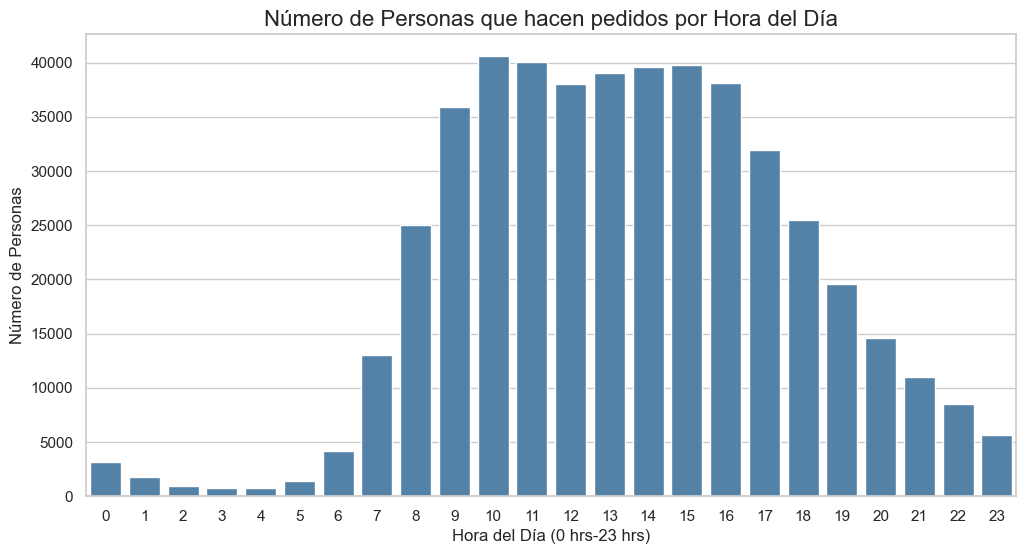

In [38]:
#df_1=instacart_orders
#librería "Matplotlib"
# método plot() de pandas y el método show() de la biblioteca pyplot de Matplotlib.
# 'order_hour_of_day'


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

orders_by_hour = df_1['order_hour_of_day'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, color="steelblue")

plt.title('Número de Personas que hacen pedidos por Hora del Día', fontsize=16)
plt.xlabel('Hora del Día (0 hrs-23 hrs)', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)

plt.show()


Escribe aquí tus conclusiones

La hora del día donde más personas hacen pedidos es a las 10 am. La cantidad que indica el gráfico es de un total de 40,578.

La hora del día donde menos personas hacen pedidos es a las 4 am. La cantidad que indica el gráfico es de un total de 765.

### [A3] ¿Cómo se distribuye el número de compras por día de las personas?

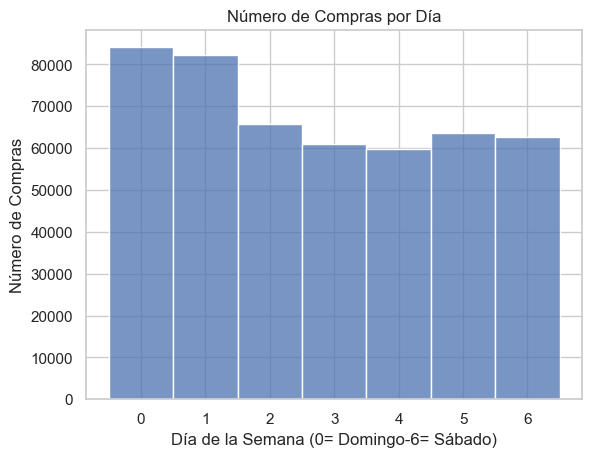

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    df_1['order_dow'],
    bins=range(0, 8),        # bins: [0,1), [1,2), ... [6,7)
    discrete=True
)

plt.title('Número de Compras por Día', fontsize=12)
plt.xlabel('Día de la Semana (0= Domingo-6= Sábado)', fontsize=12)
plt.ylabel('Número de Compras', fontsize=12)
plt.xticks(range(0, 7))
plt.show()

In [40]:
orders_by_day = df_1['order_dow'].value_counts()
orders_by_day.index.name = 'Día de la Semana'

print(orders_by_day)

Día de la Semana
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: count, dtype: int64


Escribe aquí tus conclusiones

La información del gráfico nos permite visualizar que el día que más compras realizan los usuarios es el Domingo (84,090), seguido del Lunes (82,185).

Al parecer la gente prefiere ordenar y evita cocinar el último y el primer día de la semana (mera suposición), ya que son los dos días que se hace la mayor cantidad de compras.

El día que las personas hacen menos pedidos es el Jueves, con 59,810.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

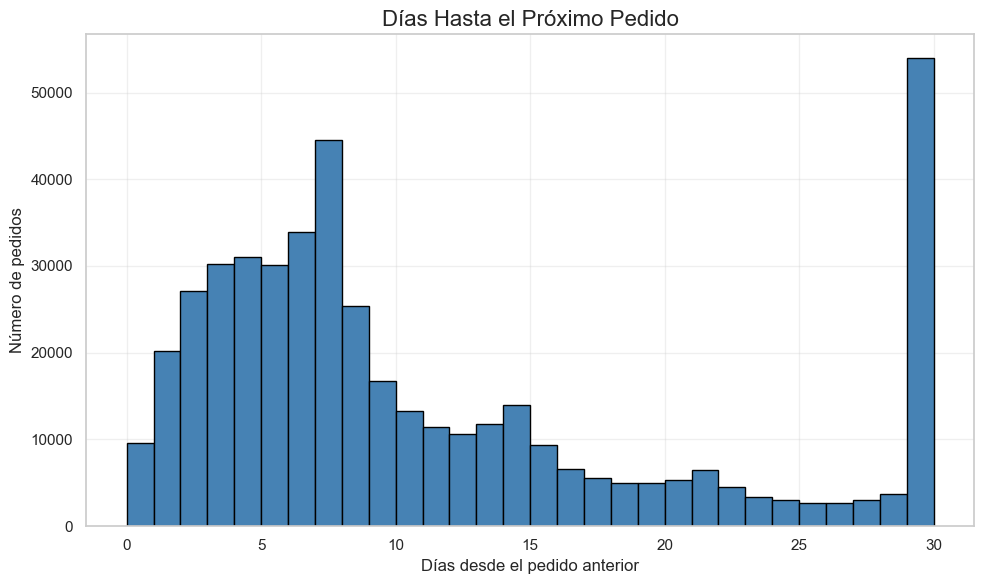

In [41]:
#'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.
#df_1=instacart_orders

#df_1['days_since_prior_order'].describe()
intervals = df_1['days_since_prior_order'].dropna().sort_values()
orders_delay_counts = df_1['days_since_prior_order'].value_counts().sort_index()
orders_delay_table = orders_delay_counts.reset_index()
orders_delay_table.columns = ['Días desde pedido anterior', 'Número de pedidos']
#print(orders_delay_table)

plt.figure(figsize=(10, 6))
plt.hist(intervals, bins=30, color='steelblue', edgecolor='black')
plt.title('Días Hasta el Próximo Pedido', fontsize=16)
plt.xlabel('Días desde el pedido anterior', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [42]:
orders_by_day = df_1['days_since_prior_order'].value_counts()
orders_by_day.index.name = 'Día de la Semana'

print(orders_by_day)

Día de la Semana
30    51337
7     44577
6     33930
4     31006
3     30224
5     30096
2     27138
8     25361
1     20179
9     16753
14    13992
10    13309
13    11737
11    11467
12    10658
0      9589
15     9416
16     6587
21     6448
17     5498
20     5302
18     4971
19     4939
22     4514
28     3745
23     3337
24     3015
27     2986
25     2711
29     2673
26     2640
Name: count, dtype: Int64


Escribe aquí tus conclusiones

Consideramos un rango de 0 a 30 días para representar el tiempo que pasó entre un pedido y otro.

Según la información obtenida en el gráfico, a los 26 días desde el pedido anterior es cuando se registra el mínimo de pedidos (2,640), mientras que a los 30 días (considerando que es el límite superior definido) es cuando se registra el máximo de pedidos (51,337).

A los 7 días desde el pedido anterior, se visualiza un aumento considerable en la cantidad de pedidos, para luego presentar una tendencia a la baja en el consumo.

# [B] Intermedio (deben completarse todos para aprobar)

<Figure size 1400x600 with 0 Axes>

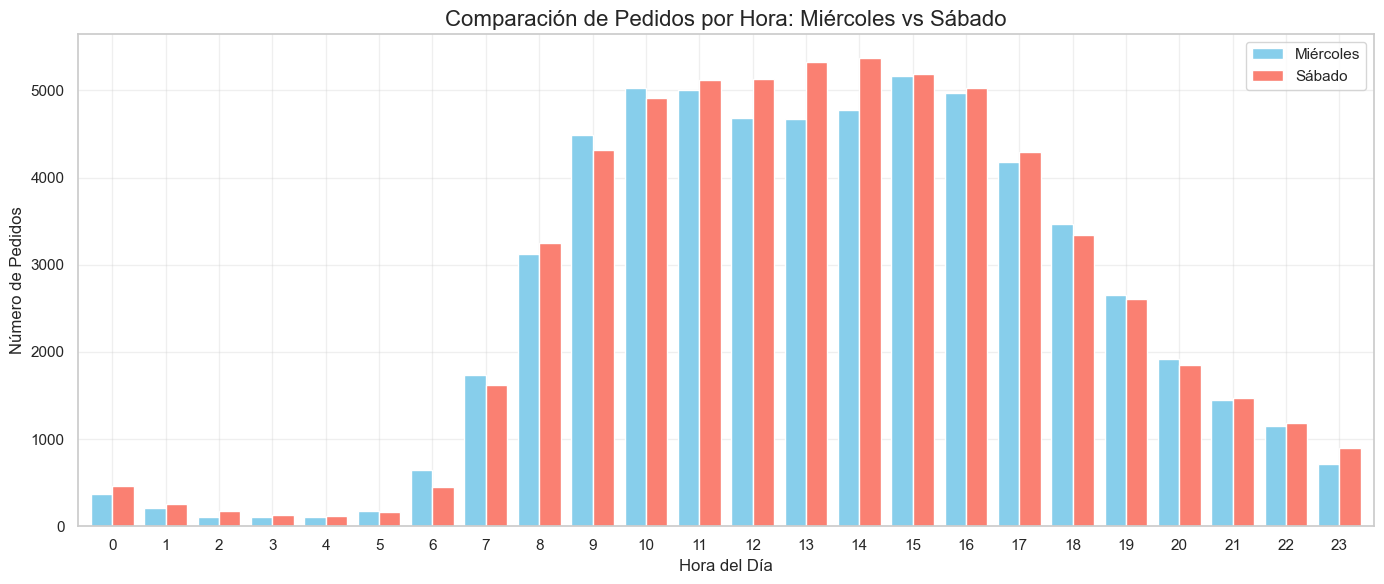

In [43]:
#df_1
#filtras miércoles y sábados
#histograma
#value_counts() y después el barplot()
#si utilizo método histplot() solo necesito datos originales y no es necesario el value_counts() u otro método

wednesday_orders= df_1[df_1['order_dow']==3]
saturday_orders= df_1[df_1['order_dow']==6]

wednesday_counts= wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts= saturday_orders['order_hour_of_day'].value_counts().sort_index()


comparación_por_hora = pd.DataFrame({
    'Miércoles': wednesday_counts,
    'Sábado': saturday_counts
}).fillna(0)

plt.figure(figsize=(14, 6))
comparación_por_hora.plot(kind='bar', width=0.8, figsize=(14,6), color=['skyblue', 'salmon'])
plt.title('Comparación de Pedidos por Hora: Miércoles vs Sábado', fontsize=16)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [44]:
dias_semana= ['Miércoles' , 'Sábado']

comparación_por_hora.columns= dias_semana

print(comparación_por_hora)

                   Miércoles  Sábado
order_hour_of_day                   
0                        373     464
1                        215     254
2                        106     177
3                        101     125
4                        108     118
5                        170     161
6                        643     451
7                       1732    1619
8                       3125    3246
9                       4490    4311
10                      5026    4919
11                      5004    5116
12                      4688    5132
13                      4674    5323
14                      4774    5375
15                      5163    5188
16                      4976    5029
17                      4175    4295
18                      3463    3338
19                      2652    2610
20                      1917    1847
21                      1450    1473
22                      1154    1185
23                       718     893


In [45]:
pedidos_por_dia = df_1['order_dow'].value_counts().sort_index()

dias_semana = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

# Cambiamos índice numérico por nombres de días
pedidos_por_dia.index = dias_semana

# Lo pasamos a DataFrame para poner títulos bonitos
tabla = pedidos_por_dia.reset_index()
tabla.columns = ['Día de la Semana', 'Total de Pedidos']

print(tabla)

  Día de la Semana  Total de Pedidos
0          Domingo             84090
1            Lunes             82185
2           Martes             65833
3        Miércoles             60897
4           Jueves             59810
5          Viernes             63488
6           Sábado             62649


Escribe aquí tus conclusiones

Tendencias muy parecidas en cuanto a número de pedidos por hora.

A partir de medianoche y hasta las 4 am, el número de pedidos es mayor en sábado. El mayor diferencial de pedidos en ese ese rango de tiempo es de 91 pedidos, a las 0 horas.

Los sábados muestra el gráfico que hay más pedidos en un horario de 11 hrs a las 17 hrs. La hora con mayor diferencia de pedidos se encuentra en un sábado a las 13 hrs.

El sábado muestra mayor cantidad de pedidos (62,649) vs el miércoles (60,897), con una diferencia de 1,752.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [46]:
pedidos_por_cliente = df_1['user_id'].value_counts()
print(pedidos_por_cliente)

user_id
149605    28
193164    26
78375     25
66664     24
134511    24
          ..
71501      1
187439     1
6845       1
176472     1
34561      1
Name: count, Length: 157437, dtype: int64


In [47]:
#df_1
#groupby por clientes contando el número de ordenes ("user_id")
# variable= núm. de ordenes de cada usuario.
# graficar histograma


pedidos_por_cliente = df_1.groupby('user_id')['order_id'].count().value_counts()
df_pedidos_por_cliente = pedidos_por_cliente.reset_index()
df_pedidos_por_cliente.columns = ['Pedidos', 'Clientes']
print(df_pedidos_por_cliente)

    Pedidos  Clientes
0         1     55357
1         2     36508
2         3     21547
3         4     13498
4         5      8777
5         6      6012
6         7      4240
7         8      3019
8         9      2152
9        10      1645
10       11      1308
11       12       947
12       13       703
13       14       512
14       15       437
15       16       263
16       17       184
17       18       121
18       19        85
19       20        52
20       22        23
21       21        22
22       23        19
23       24         3
24       25         1
25       28         1
26       26         1


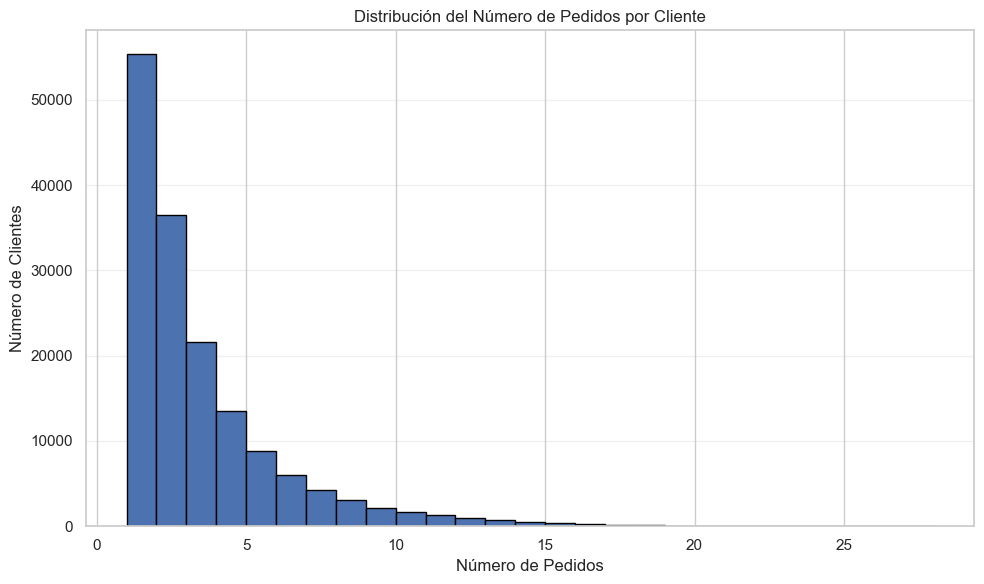

In [48]:
pedidos_por_cliente = df_1['user_id'].value_counts()
plt.figure(figsize=(10,6))
plt.hist(pedidos_por_cliente, bins=range(1, pedidos_por_cliente.max()+1), edgecolor='black')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Escribe aquí tus conclusiones Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).


Primero visualizamos la cantidad de pedidos por 'user_id'. 

El siguiente paso consistió en agrupar al número de clientes dependiendo de la cantidad de pedidos realizados, para finalmente mostrar a través de un gráfico los resultados.

Observamos que conforme el número de pedidos aumenta, el número de clientes que hace pedidos va disminuyendo.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
#groupby por producto contando el número de veces que se piden ("product_id")
#después del groupby(), en la misma línea, aplicar reset_index() y sort_values() 
#df_5= order_products

df_top_20=df_5.groupby("product_id")["product_id"].count().reset_index(name="conteo_productos").sort_values(by="conteo_productos", ascending=False)

df_top_20_nueva=pd.merge(df_top_20, df_2,on='product_id', how='left')

df_top_20_nueva[['product_id','product_name','conteo_productos']].head(20)

,product_id,product_name,conteo_productos
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


### Escribe aquí tus conclusiones

Observamos que los primeros 9 productos de la lista representan frutas y verduras (45%).

En general toda la lista está conformada por productos comestibles (95% por frutas y verduras).

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
productos_por_pedido = df_5.groupby('order_id')['product_id'].count()
#print(productos_por_pedido)

distribucion_pedidos = productos_por_pedido.value_counts().sort_index()
df5_distribución_pedidos = distribucion_pedidos.reset_index()
df5_distribución_pedidos.columns = ['Número de Productos', 'Pedidos']
#print(df5_distribución_pedidos)

df5_distribución_pedidos.head(20)

,Número de Productos,Pedidos
0,1,21847
1,2,26292
2,3,29046
3,4,31054
4,5,31923
5,6,31698
6,7,30822
7,8,28539
8,9,25742
9,10,23248


In [51]:
print(productos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


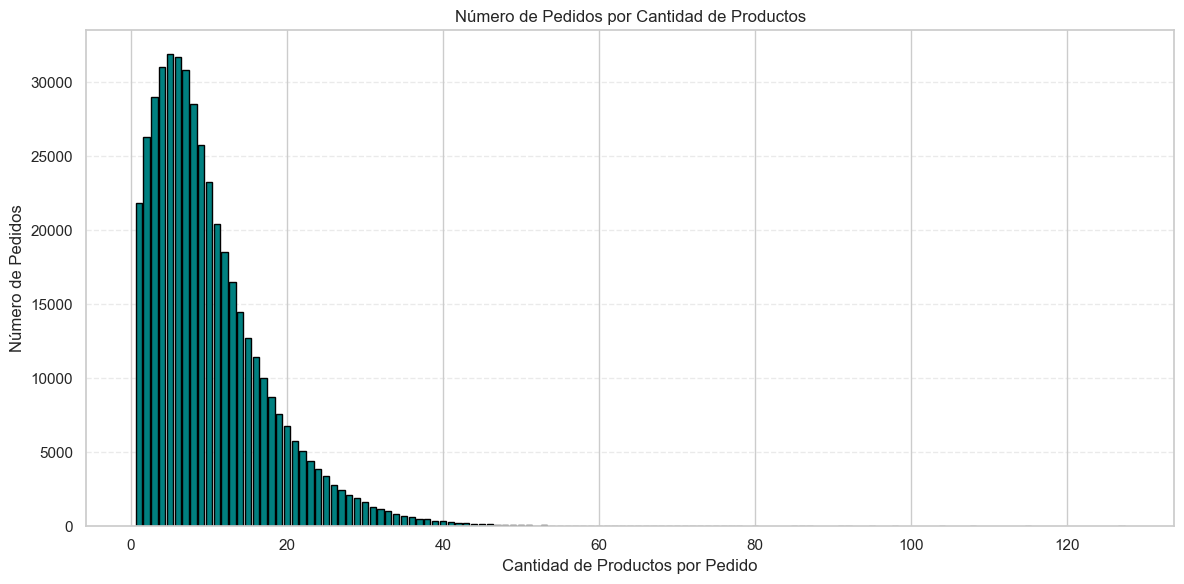

In [52]:
# Como refuerzo visual
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(distribucion_pedidos.index, distribucion_pedidos.values, color='teal', edgecolor='black')
plt.title('Número de Pedidos por Cantidad de Productos')
plt.xlabel('Cantidad de Productos por Pedido')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Escribe aquí tus conclusiones

Encontramos que hay 125,497 pedidos (28%) donde los clientes llevan entre 4 y 7 productos. Este dato nos confirma que una mayor parte de todos los pedidos llevan dicho rango de número de productos.

Conforme aumenta la cantidad de productos por pedido, la cantidad de pedidos va disminuyendo.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
productos_reordenados = df_5[df_5['reordered'] == 1]

reordenados_por_producto = productos_reordenados.groupby('product_id').size()

top_20_reordenados = reordenados_por_producto.sort_values(ascending=False).head(20)

#merge
top_20 = top_20_reordenados.reset_index()
top_20.columns = ['product_id','reorder_count']
top_20 = top_20.merge(df_2[['product_id','product_name']], on='product_id')

top_20 = top_20[['product_id','product_name','reorder_count']]
display(top_20)



,product_id,product_name,reorder_count
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


### Escribe aquí tus conclusiones

Según la información mostrada por parte de la tabla, el 93% del TOP 20 de productos que más se vuelven a ordenar corresponden a frutas y verduras.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [54]:
total_por_producto = df_5.groupby('product_id').size()

reordenado_por_producto = df_5[df_5['reordered'] == 1]\
                          .groupby('product_id').size()

frecuencia = pd.DataFrame({
    'total_pedidos': total_por_producto,
    'reordenados': reordenado_por_producto
}).fillna(0)

frecuencia['proporcion_reordenado'] = frecuencia['reordenados'] / frecuencia['total_pedidos']
#print(frecuencia.sort_values(by='proporcion_reordenado', ascending=False))


frecuencia_ordenada = frecuencia
frecuencia_ordenada_descendente = frecuencia.sort_values(by='proporcion_reordenado', ascending=False)

display(frecuencia_ordenada.round(4))
display(frecuencia_ordenada_descendente.round(4))

,total_pedidos,reordenados,proporcion_reordenado
product_id,,,
1,280,158.0,0.5643
2,11,0.0,0.0000
3,42,31.0,0.7381
4,49,25.0,0.5102
7,2,1.0,0.5000
...,...,...,...
49690,5,4.0,0.8000
49691,72,31.0,0.4306
49692,12,5.0,0.4167


,total_pedidos,reordenados,proporcion_reordenado
product_id,,,
14721,1,1.0,1.0
20949,3,3.0,1.0
6723,10,10.0,1.0
6732,3,3.0,1.0
45088,1,1.0,1.0
...,...,...,...
10485,2,0.0,0.0
37690,2,0.0,0.0
10484,1,0.0,0.0


### Escribe aquí tus conclusiones

Al momento de acomodar las proporciones de forma descendente, observamos que las proporciones de mayor valor (100%) es debido a que las cantidades de reordenes por producto coinciden con el total de pedidos.

Mientras que las proporciones menores (0%) es debido a que no se han tenido reordenes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [55]:
df_completo = df_5.merge(df_1[['order_id', 'user_id']], on='order_id', how='left')

In [56]:
total_por_usuario = df_completo.groupby('user_id').size()

In [57]:
reordenados_por_usuario = df_completo[df_completo['reordered'] == 1].groupby('user_id').size()

In [58]:
reorden_fidelidad = pd.DataFrame({
    'total_productos': total_por_usuario,
    'reordenados': reordenados_por_usuario
}).fillna(0)

In [60]:
reorden_fidelidad['proporcion_reordenados'] = (
    reorden_fidelidad['reordenados'] / reorden_fidelidad['total_productos']
).round(4)

frecuencia_ordenada = reorden_fidelidad
frecuencia_ordenada_descendente = reorden_fidelidad.sort_values(by='proporcion_reordenados', ascending=False)

display(frecuencia_ordenada.round(4))
display(frecuencia_ordenada_descendente.round(4))

,total_productos,reordenados,proporcion_reordenados
user_id,,,
2,26,1.0,0.0385
4,2,0.0,0.0000
5,12,8.0,0.6667
6,4,0.0,0.0000
7,14,13.0,0.9286
...,...,...,...
206203,27,6.0,0.2222
206206,21,15.0,0.7143
206207,46,41.0,0.8913


,total_productos,reordenados,proporcion_reordenados
user_id,,,
137587,3,3.0,1.0
173474,2,2.0,1.0
13918,4,4.0,1.0
62300,7,7.0,1.0
62307,1,1.0,1.0
...,...,...,...
190953,9,0.0,0.0
119371,10,0.0,0.0
63173,4,0.0,0.0


### Escribe aquí tus conclusiones

Se tiene un total de 149,626 valores que nos muestran la proporción de productos por cliente que se han reordenado.

Se decide mostrar en dos tablas, la primera en orden aleatorio de 'proporcion_reordenados' y la segunda en orden descendente.

Para este ejercicio de proporción por cliente, observamos que la cantidad de datos triplican los datos del ejercicio donde calculamos la proporción por producto.

Sin embargo, la conclusión es la misma:

"Al momento de acomodar las proporciones de forma descendente, observamos que las proporciones de mayor valor (100%) es debido a que las cantidades de reordenes por producto coinciden con el total de pedidos.

Mientras que las proporciones menores (0%) es debido a que no se han tenido reordenes."

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
primeros_pedidos = df_5[df_5['add_to_cart_order'] == 1]

In [62]:
conteo_productos = primeros_pedidos['product_id'].value_counts().reset_index()
conteo_productos.columns = ['product_id', 'num_veces_primero']

In [63]:
productos_primero = conteo_productos.merge(df_2, on='product_id')

In [64]:
productos_primero = productos_primero[['product_id', 'product_name', 'num_veces_primero']]

In [65]:
top_20 = productos_primero.head(20)
print(top_20)

    product_id                 product_name  num_veces_primero
0        24852                       BANANA              15562
1        13176       BAG OF ORGANIC BANANAS              11026
2        27845           ORGANIC WHOLE MILK               4363
3        21137         ORGANIC STRAWBERRIES               3946
4        47209         ORGANIC HASS AVOCADO               3390
5        21903         ORGANIC BABY SPINACH               3336
6        47766              ORGANIC AVOCADO               3044
7        19660                 SPRING WATER               2336
8        16797                 STRAWBERRIES               2308
9        27966          ORGANIC RASPBERRIES               2024
10       44632   SPARKLING WATER GRAPEFRUIT               1914
11       49235          ORGANIC HALF & HALF               1797
12       47626                  LARGE LEMON               1737
13         196                         SODA               1733
14       38689     ORGANIC REDUCED FAT MILK            

### Escribe aquí tus conclusiones

Los dos primeros artículos del TOP 20 que los usuarios ponen primero en sus carritos son relacionados a plátanos. El número de veces en que los dos primeros artículos son depositados primero en el carrito supera por un amplio margen al tercer artículo (más del doble de diferencia entre el segundo y tercer puesto).

# Conclusión general del proyecto:

Al llegar al final del presente proyecto puedo concluir que ha sido bastante retador pero al mismo tiempo ha servido para reforzar y poner en práctica conocimientos previos.

Resalto la importancia que tiene para un análisis el preprocesamiento correcto de datos. Sin esto nuestro análisis se puede sin duda ver afectado muy facilmente y conlleva el riesgo de trabajar con información incompleta y por lo tanto incorrecta. 

Esto tendrá como consecuencia el que se interprete y finalmente se tomen decisiones de manera sesgada, afectando el objetivo que se busca con todo esto. 

Esto se puede traducir en desperdicio de recursos y pérdidas económicas para una empresa. 